<a href="https://colab.research.google.com/github/Ruthigal895/PRODIGY_DS_04/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape: (74682, 4)
     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


<ipython-input-3-5dd0a572b51a>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


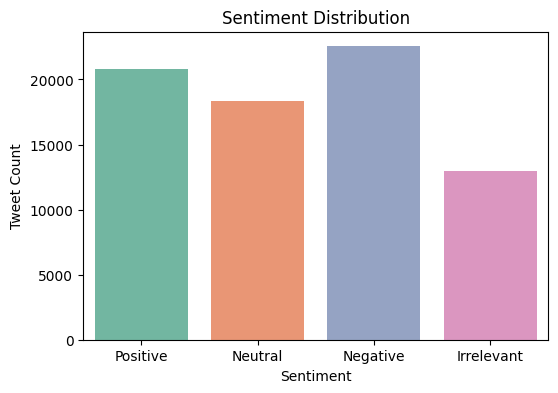

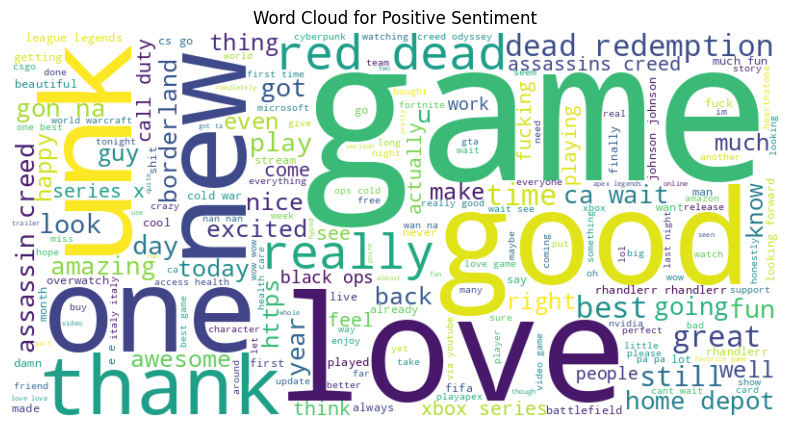

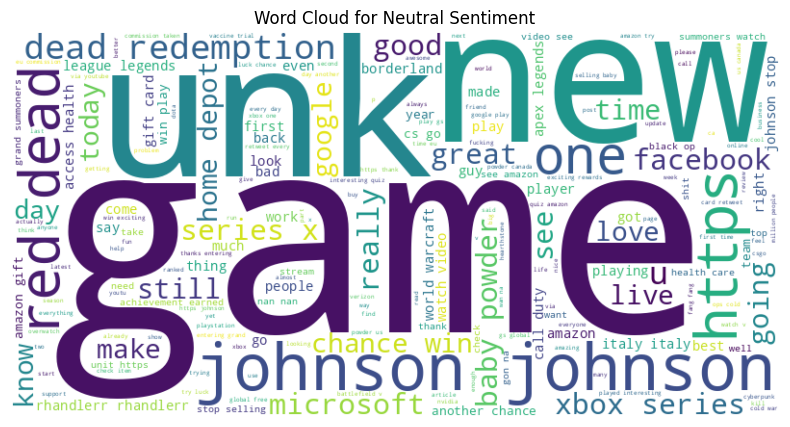

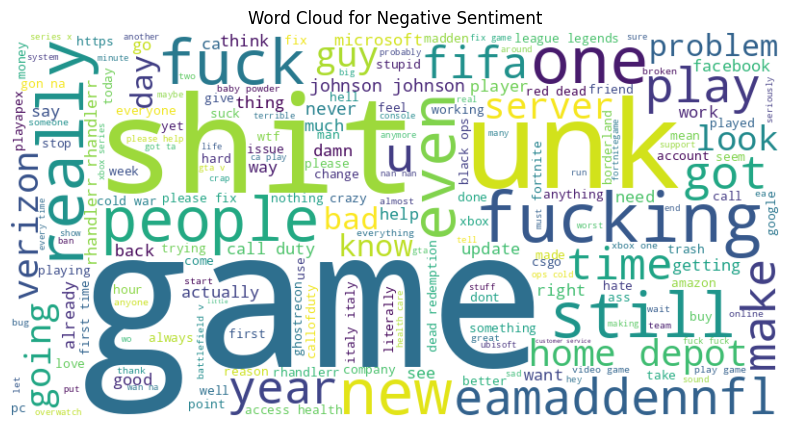

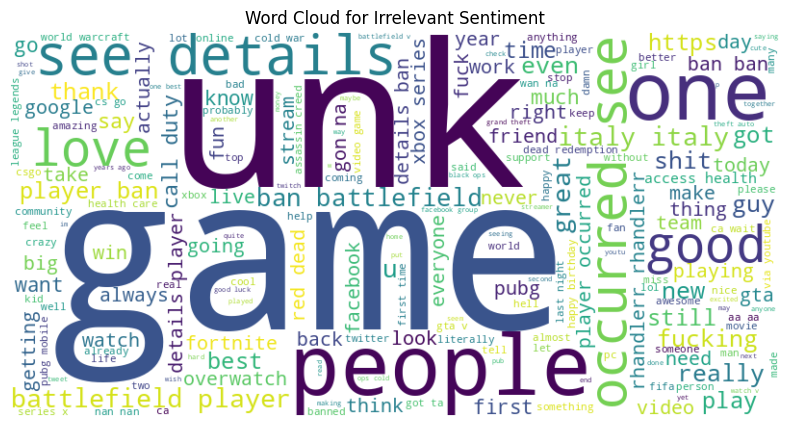

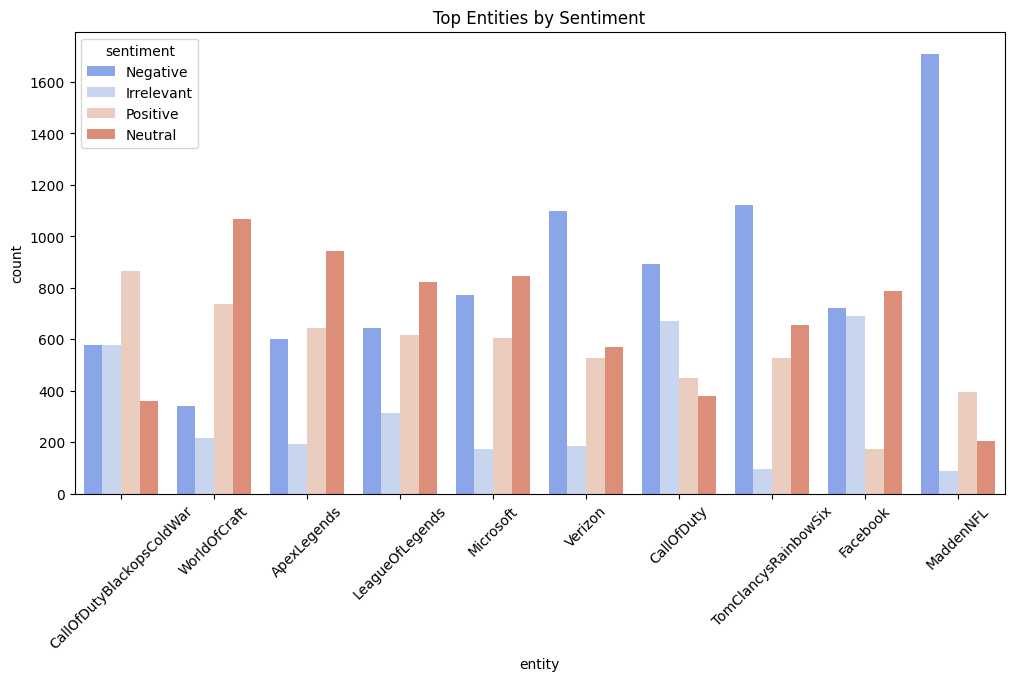

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


# 1. LOAD THE DATA

df = pd.read_csv('/content/twitter_training.csv', header=None, names=['id', 'entity', 'sentiment', 'content'])

# Preview
print("Shape:", df.shape)
print(df.head())


# 2. CLEAN TEXT DATA

def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]  # remove punctuation/numbers
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['clean_content'] = df['content'].astype(str).apply(clean_text)


# 3. VISUALIZE SENTIMENT DISTRIBUTION

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


# 4. WORDCLOUDS FOR EACH SENTIMENT

for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['clean_content'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


# 5. OPTIONAL: ENTITY-WISE SENTIMENT COUNTS

top_entities = df['entity'].value_counts().head(10).index.tolist()
df_filtered = df[df['entity'].isin(top_entities)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='entity', hue='sentiment', palette='coolwarm')
plt.title('Top Entities by Sentiment')
plt.xticks(rotation=45)
plt.show()
